In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [115]:
user_transactions = pd.read_pickle('cleaned_user_transactions.pkl')

In [116]:
user_transactions

,AverageCPI,TotalTransactions,TotalMonetary,MostRecentTransaction,MorningTransactions,AfternoonTransactions,EveningTransactions,NightTransactions,WeekendTransactions,WeekdayTransactions,CostPerTransaction
UserId,,,,,,,,,,,
259266.0,1.440000,2,0.00,2018-04-01 06:17:00,1.000000,0.000,0.0,0.000000,1.000000,0.000000,0.000000
259287.0,3.532115,7,35759.40,2028-02-18 10:57:00,0.857143,0.000,0.0,0.142857,0.428571,0.571429,5108.485714
259308.0,1.179594,4,11982.24,2018-12-07 09:13:00,0.750000,0.250,0.0,0.000000,0.750000,0.250000,2995.560000
259329.0,5.853333,1,12087.84,2019-02-02 05:51:00,0.000000,0.000,0.0,1.000000,1.000000,0.000000,12087.840000
259350.0,2.186875,1,2443.20,2018-04-16 12:01:00,0.000000,1.000,0.0,0.000000,0.000000,1.000000,2443.200000
...,...,...,...,...,...,...,...,...,...,...,...
383880.0,6.583000,1,1497.30,2018-05-19 05:52:00,0.000000,0.000,0.0,1.000000,1.000000,0.000000,1497.300000
383901.0,7.762857,1,669.60,2018-08-24 06:53:00,1.000000,0.000,0.0,0.000000,1.000000,0.000000,669.600000
383922.0,4.858190,3,1466.10,2019-02-13 07:43:00,1.000000,0.000,0.0,0.000000,0.333333,0.666667,488.700000


In [ ]:
user_transactions[''.idxmax(axis=1)

In [75]:
CPI = pd.DataFrame(user_transactions['AverageCPI'])

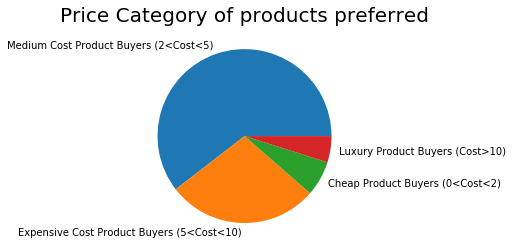

In [139]:
def cpi_category(x):
    if x < 2:
        return "Cheap Product Buyers (0<Cost<2)"
    elif x < 5:
        return "Medium Cost Product Buyers (2<Cost<5)"
    elif x < 10:
        return "Expensive Cost Product Buyers (5<Cost<10)"
    else:
        return "Luxury Product Buyers (Cost>10)"

CPI['Category'] = CPI['AverageCPI'].apply(lambda x: cpi_category(x))
CPI['Category'].value_counts().plot(kind='pie', label='')
plt.title('Price Category of products preferred', fontsize=20)
plt.show()

In [96]:
user_transactions['TotalMonetary'].describe()

count    4.363000e+03
mean     3.443458e+04
std      1.234347e+06
min     -9.876960e+03
25%      2.443530e+03
50%      5.360400e+03
75%      1.325463e+04
max      8.142170e+07
Name: TotalMonetary, dtype: float64

In [112]:
user_transactions[(user_transactions.TotalMonetary < 15000) & (user_transactions.TotalMonetary > 5000)].count()

AverageCPI               1336
TotalTransactions        1336
TotalMonetary            1336
MostRecentTransaction    1336
MorningTransactions      1336
AfternoonTransactions    1336
EveningTransactions      1336
NightTransactions        1336
WeekendTransactions      1336
WeekdayTransactions      1336
CostPerTransaction       1336
dtype: int64

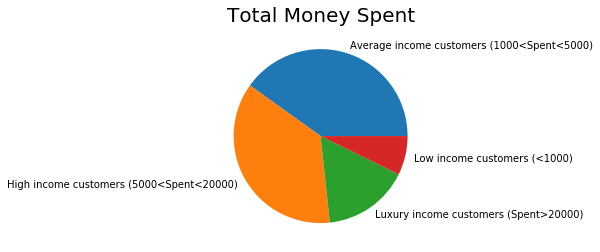

In [138]:
def spend_category(x):
    if x < 1000:
        return "Low income customers (<1000)"
    elif x < 5000:
        return "Average income customers (1000<Spent<5000)"
    elif x < 20000:
        return "High income customers (5000<Spent<20000)"
    else:
        return "Luxury income customers (Spent>20000)"
    
user_transactions['MonetaryCategory'] = user_transactions['TotalMonetary'].apply(lambda x: spend_category(x))
user_transactions['MonetaryCategory'].value_counts().plot(kind='pie', label='')
plt.title('Total Money Spent', fontsize=20)
plt.show()

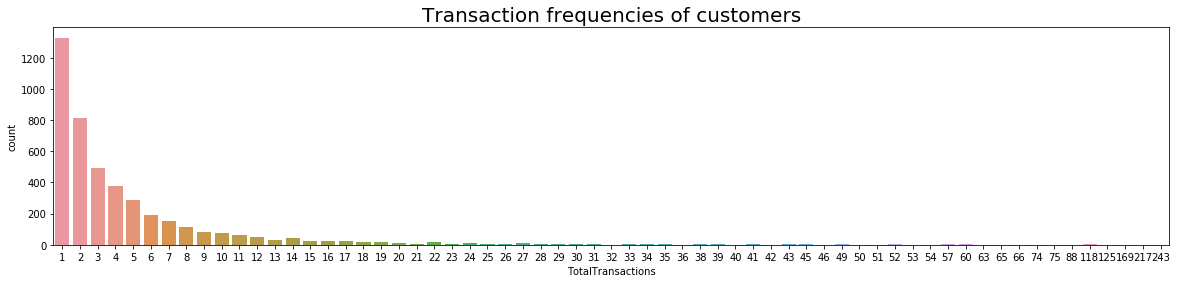

In [142]:
plt.figure(figsize=(20,4))
sns.countplot(user_transactions['TotalTransactions'])
plt.title('Transaction frequencies of customers', fontsize=20)
plt.show()

UserId
259266.0      MorningTransactions
259287.0      MorningTransactions
259308.0      MorningTransactions
259329.0        NightTransactions
259350.0    AfternoonTransactions
                    ...          
383880.0        NightTransactions
383901.0      MorningTransactions
383922.0      MorningTransactions
383943.0      MorningTransactions
384027.0      MorningTransactions
Length: 4363, dtype: object

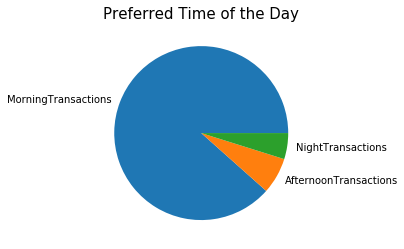

In [135]:
user_transactions['TimeCategory'] = user_transactions[["MorningTransactions", "AfternoonTransactions", 'EveningTransactions', 'NightTransactions']].idxmax(axis=1)
user_transactions['TimeCategory'].value_counts().plot(kind='pie', label='')
plt.title('Preferred Time of the Day', fontsize=15)
plt.show()

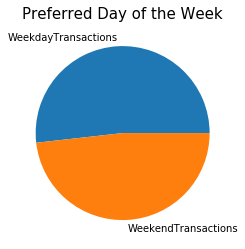

In [140]:
user_transactions['DayCategory'] = user_transactions[['WeekendTransactions', 'WeekdayTransactions']].idxmax(axis=1)
user_transactions['DayCategory'].value_counts().plot(kind='pie', label='')
plt.title('Preferred Day of the Week', fontsize=15)
plt.show()